# 1 Corner Detection

The second moment matrix:
$$
\mathbf{M}=
\begin{bmatrix}
\sum_{(x,y)\in w}w(x,y)I_x^2(x,y) & \sum_{(x,y)\in w}w(x,y)I_x(x,y)I_y(x,y) \\
\sum_{(x,y)\in w}w(x,y)I_x(x,y)I_y(x,y) & \sum_{(x,y)\in w}w(x,y)I_y^2(x,y)
\end{bmatrix}
$$

$$
E(u,v)=
\begin{bmatrix}
u & v \\
\end{bmatrix}
\mathbf{M}
\begin{bmatrix}
u\\
v
\end{bmatrix}
$$

Compute the second moment matrix:

1. Compute image gradients $I_x$, $I_y$
2. Compute gradients $I_x^2$, $I_y^2$, $I_xI_y$
3. Convolve with window function
4. Assemble second moment matrix at each pixel

Corner Detection:

1. Compute the gradient at each point in the image
2. Create the M matrix from the entries in the gradient
3. Compute the eigenvalues
4. Find points with large response (λmin > threshold)
5. Choose those points where λmin is a local maximum as features

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

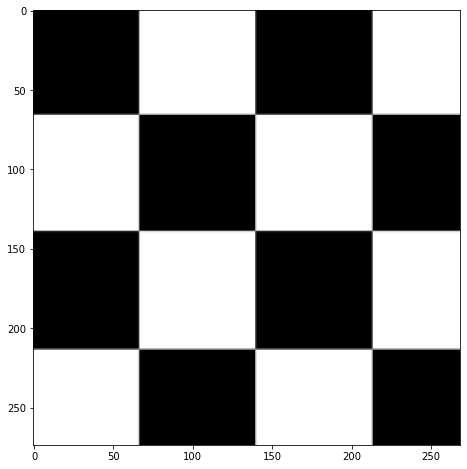

In [65]:
img = cv2.imread('img/example_03.PNG', cv2.IMREAD_GRAYSCALE)
# img = image_process.separable_gaussian_filter(image_process.boundary_process(img, 6, 'same', 'reflect'), 3, 1)
plt.figure(figsize=(8,8))
utils.show_img(img)

In [66]:
smm_map = image_process.compute_second_moment_matrix(img, 5, 1)

In [67]:
height = img.shape[0]
width = img.shape[1]
min_eigenvalue_matrix = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        min_eigenvalue_matrix[m][n] = np.abs(np.linalg.eigvals(smm_map[m][n]).min())

Text(0.5, 1.0, 'High Threshold')

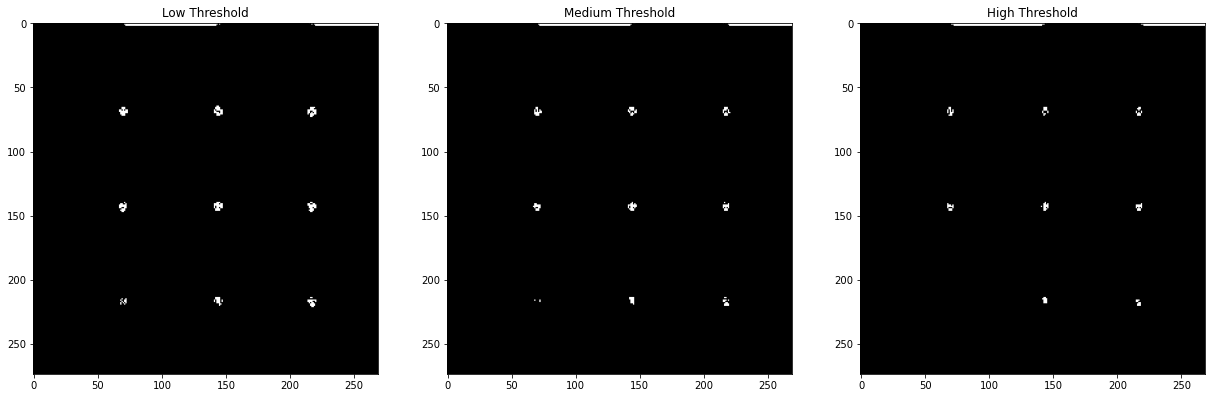

In [74]:
min_eigenvalue_matrix_img = utils.normalize(min_eigenvalue_matrix)
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(image_process.thresholding_filter(min_eigenvalue_matrix_img, 10))
plt.title('Low Threshold')
plt.subplot(132)
utils.show_img(image_process.thresholding_filter(min_eigenvalue_matrix_img, 15))
plt.title('Medium Threshold')
plt.subplot(133)
utils.show_img(image_process.thresholding_filter(min_eigenvalue_matrix_img, 20))
plt.title('High Threshold')